# Checking data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/yolov8_attempt/anime_data.zip

In [3]:
!python -m pip install opencv-python

In [4]:
!python -m pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 661.2/661.2 kB 3.3 MB/s eta 0:00:00


In [7]:
from glob import glob
tr_imgs = glob('/content/train/images/*')

(640, 640, 3)


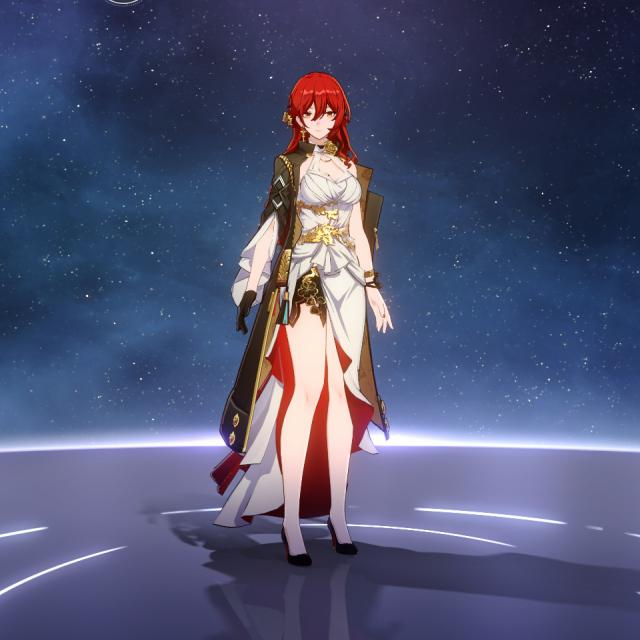

In [24]:
from PIL import Image
import cv2
print(cv2.imread(tr_imgs[1], cv2.COLOR_BGR2RGB).shape)
Image.open(tr_imgs[1])

# Training model

In [25]:
from ultralytics import YOLO

In [26]:
model = YOLO("yolov8n.pt")

100%|██████████| 6.23M/6.23M [00:00<00:00, 80.5MB/s]


In [33]:
sft_model = model.train(data="/content/data.yaml", epochs=70, imgsz = 640, batch = 64 ,lr0=0.0001, dropout= 0.15, device=0)

Ultralytics YOLOv8.0.228 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/data.yaml, epochs=70, time=None, patience=50, batch=64, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.15, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, format=torch

train: Scanning /content/train/labels.cache... 1104 images, 6 backgrounds, 0 corrupt: 100%|██████████| 1104/1104 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 4, len(boxes) = 1155. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/valid/labels.cache... 135 images, 0 backgrounds, 0 corrupt: 100%|██████████| 135/135 [00:00<?, ?it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000222, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
70 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/70      9.29G      3.086      5.289      2.886         42        640: 100%|██████████| 18/18 [00:25<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.23it/s]

                   all        135        148          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/70      8.54G      2.227        4.9      2.218         45        640: 100%|██████████| 18/18 [00:19<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.83s/it]

                   all        135        148    0.00626     0.0187    0.00601    0.00393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/70      8.54G        1.6      4.502      1.798         36        640: 100%|██████████| 18/18 [00:20<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.05it/s]

                   all        135        148     0.0209      0.478      0.063     0.0429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/70      8.59G      1.356      4.243      1.657         40        640: 100%|██████████| 18/18 [00:20<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.45s/it]

                   all        135        148     0.0145      0.708     0.0972      0.078



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/70      8.59G      1.252      4.018      1.572         42        640: 100%|██████████| 18/18 [00:20<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.09s/it]

                   all        135        148     0.0165      0.792      0.146      0.123



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/70      8.54G      1.163       3.76       1.51         37        640: 100%|██████████| 18/18 [00:21<00:00,  1.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.43s/it]

                   all        135        148      0.295      0.323      0.151      0.123



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/70      8.54G      1.098      3.588      1.457         31        640: 100%|██████████| 18/18 [00:20<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.02s/it]

                   all        135        148      0.202      0.333      0.167      0.127



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/70      8.54G      1.063      3.395      1.425         46        640: 100%|██████████| 18/18 [00:21<00:00,  1.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.45s/it]


                   all        135        148      0.254      0.409      0.218      0.174

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/70      8.54G      1.074      3.333      1.429         35        640: 100%|██████████| 18/18 [00:20<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.05s/it]

                   all        135        148      0.365       0.42       0.29      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/70      8.54G      1.059      3.177      1.397         41        640: 100%|██████████| 18/18 [00:19<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.55s/it]

                   all        135        148      0.209      0.345      0.297      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/70      8.54G     0.9958      3.049      1.354         31        640: 100%|██████████| 18/18 [00:19<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.02it/s]

                   all        135        148      0.401      0.391      0.367      0.298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/70      8.59G     0.9652      2.904      1.322         40        640: 100%|██████████| 18/18 [00:20<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.70s/it]

                   all        135        148      0.408      0.423      0.397      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/70      8.54G     0.9928      2.841      1.334         48        640: 100%|██████████| 18/18 [00:19<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.03it/s]


                   all        135        148      0.736      0.365      0.455      0.373

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/70      8.54G     0.9293      2.701      1.293         36        640: 100%|██████████| 18/18 [00:21<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.35s/it]


                   all        135        148      0.549      0.424      0.496      0.411

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/70      8.51G     0.9199      2.631      1.283         34        640: 100%|██████████| 18/18 [00:19<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.02s/it]

                   all        135        148      0.411      0.459      0.459      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/70      8.54G     0.9301      2.529      1.285         31        640: 100%|██████████| 18/18 [00:21<00:00,  1.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.09s/it]

                   all        135        148      0.519       0.45      0.499      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/70      8.59G     0.9042      2.421      1.266         32        640: 100%|██████████| 18/18 [00:23<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.02it/s]

                   all        135        148      0.568      0.547      0.603      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/70      8.54G     0.9078      2.383      1.263         34        640: 100%|██████████| 18/18 [00:21<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.17s/it]

                   all        135        148      0.657      0.529      0.622      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/70      8.59G      0.911      2.285      1.263         27        640: 100%|██████████| 18/18 [00:22<00:00,  1.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.01it/s]


                   all        135        148      0.494      0.591      0.559      0.455

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/70      8.59G     0.9181      2.261      1.273         31        640: 100%|██████████| 18/18 [00:20<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.04it/s]

                   all        135        148      0.595       0.54      0.599      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/70      8.54G     0.8563      2.124       1.22         40        640: 100%|██████████| 18/18 [00:19<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.01s/it]

                   all        135        148      0.693      0.488      0.606      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/70      8.54G     0.8938      2.125      1.252         26        640: 100%|██████████| 18/18 [00:22<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.02s/it]

                   all        135        148      0.748       0.51      0.677      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/70      8.59G     0.8546      2.016      1.213         39        640: 100%|██████████| 18/18 [00:19<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.06s/it]

                   all        135        148      0.634      0.554      0.626      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/70      8.54G     0.8702      1.996      1.223         35        640: 100%|██████████| 18/18 [00:21<00:00,  1.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.02s/it]

                   all        135        148       0.69      0.606      0.704      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/70      8.54G     0.8654      1.945      1.217         32        640: 100%|██████████| 18/18 [00:19<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.14it/s]


                   all        135        148      0.621       0.67      0.704      0.583

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/70      8.54G     0.8335      1.887      1.199         32        640: 100%|██████████| 18/18 [00:21<00:00,  1.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.09s/it]

                   all        135        148       0.84      0.598      0.727      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/70      8.59G     0.8478      1.843      1.197         39        640: 100%|██████████| 18/18 [00:19<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.07it/s]

                   all        135        148      0.641      0.649      0.702      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/70      8.59G     0.8202      1.797      1.178         41        640: 100%|██████████| 18/18 [00:21<00:00,  1.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.07it/s]

                   all        135        148      0.743      0.706      0.742      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/70      8.54G     0.8281      1.756       1.19         36        640: 100%|██████████| 18/18 [00:19<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.06s/it]

                   all        135        148      0.689      0.573      0.666      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/70      8.54G     0.8333      1.745       1.19         38        640: 100%|██████████| 18/18 [00:21<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.10s/it]

                   all        135        148      0.736      0.704      0.749      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/70      8.54G     0.8402      1.668      1.202         31        640: 100%|██████████| 18/18 [00:22<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.04it/s]


                   all        135        148       0.78      0.698      0.739      0.599

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/70      8.59G     0.8173      1.654      1.177         38        640: 100%|██████████| 18/18 [00:20<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.60s/it]

                   all        135        148      0.843      0.621      0.733      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/70      8.54G     0.7941      1.573      1.173         35        640: 100%|██████████| 18/18 [00:19<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.00it/s]

                   all        135        148      0.799      0.698      0.748      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/70      8.54G     0.8279      1.598      1.182         49        640: 100%|██████████| 18/18 [00:20<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.46s/it]

                   all        135        148      0.816      0.696      0.742      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/70      8.54G     0.8106      1.578      1.169         38        640: 100%|██████████| 18/18 [00:20<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.04s/it]

                   all        135        148      0.729      0.725      0.756      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/70      8.54G     0.8179      1.541      1.171         36        640: 100%|██████████| 18/18 [00:19<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.47s/it]


                   all        135        148      0.781      0.714      0.752      0.612

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/70      8.59G     0.7871      1.517      1.161         39        640: 100%|██████████| 18/18 [00:19<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.05it/s]

                   all        135        148      0.838      0.674      0.744      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/70      8.54G     0.8016      1.513      1.166         31        640: 100%|██████████| 18/18 [00:20<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.58s/it]


                   all        135        148      0.853      0.697      0.772      0.637

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/70      8.59G     0.7938      1.463      1.168         40        640: 100%|██████████| 18/18 [00:20<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.00it/s]

                   all        135        148      0.877      0.691      0.768      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/70      8.54G     0.7752      1.444       1.15         27        640: 100%|██████████| 18/18 [00:20<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.44s/it]

                   all        135        148      0.842       0.72      0.766      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/70      8.51G     0.7884      1.467       1.16         35        640: 100%|██████████| 18/18 [00:22<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.04s/it]

                   all        135        148      0.815      0.714      0.784      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/70      8.54G     0.7902      1.404      1.155         34        640: 100%|██████████| 18/18 [00:20<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.62s/it]

                   all        135        148      0.886      0.715      0.778      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/70      8.54G     0.7918      1.426      1.153         43        640: 100%|██████████| 18/18 [00:20<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.01s/it]

                   all        135        148      0.883      0.692       0.76      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/70      8.59G     0.7859      1.371       1.15         35        640: 100%|██████████| 18/18 [00:19<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.52s/it]

                   all        135        148      0.836      0.722       0.77      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/70      8.54G     0.7759      1.376      1.135         39        640: 100%|██████████| 18/18 [00:19<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.08s/it]

                   all        135        148      0.873      0.723      0.789      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/70      8.59G     0.7576      1.349      1.139         39        640: 100%|██████████| 18/18 [00:18<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.52s/it]


                   all        135        148      0.842      0.699       0.78      0.654

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/70      8.54G     0.7733      1.351      1.145         47        640: 100%|██████████| 18/18 [00:20<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.01it/s]

                   all        135        148      0.801      0.735      0.792      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/70      8.59G     0.7484      1.298      1.138         43        640: 100%|██████████| 18/18 [00:19<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.60s/it]


                   all        135        148        0.9      0.707      0.783      0.642

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/70      8.54G     0.7578      1.302      1.134         44        640: 100%|██████████| 18/18 [00:20<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.05s/it]

                   all        135        148      0.894      0.718      0.793      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/70      8.59G     0.7545      1.275      1.134         40        640: 100%|██████████| 18/18 [00:18<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.57s/it]


                   all        135        148      0.873      0.719      0.792      0.654

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      51/70      8.54G     0.7798      1.296      1.152         22        640: 100%|██████████| 18/18 [00:20<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.06it/s]


                   all        135        148      0.891      0.713      0.787      0.651

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      52/70      8.54G     0.7559      1.296      1.137         35        640: 100%|██████████| 18/18 [00:21<00:00,  1.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.51s/it]

                   all        135        148      0.896      0.708      0.791      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      53/70      8.51G     0.7679      1.244      1.133         40        640: 100%|██████████| 18/18 [00:19<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.01s/it]

                   all        135        148      0.864      0.725        0.8      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      54/70      8.54G     0.7631      1.283      1.141         30        640: 100%|██████████| 18/18 [00:22<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.43s/it]

                   all        135        148      0.893      0.705      0.788      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      55/70      8.54G     0.7466      1.244      1.135         34        640: 100%|██████████| 18/18 [00:20<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.01s/it]

                   all        135        148      0.902      0.698      0.793      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      56/70      8.54G     0.7323      1.237      1.118         38        640: 100%|██████████| 18/18 [00:20<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.49s/it]


                   all        135        148       0.89      0.714      0.789      0.649

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      57/70      8.54G     0.7479      1.248      1.134         34        640: 100%|██████████| 18/18 [00:19<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.00it/s]

                   all        135        148      0.884      0.715      0.794      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      58/70      8.51G     0.7716      1.246      1.142         39        640: 100%|██████████| 18/18 [00:20<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.38s/it]

                   all        135        148      0.897      0.717      0.794      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      59/70      8.59G     0.7632      1.227      1.136         38        640: 100%|██████████| 18/18 [00:19<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.09it/s]

                   all        135        148      0.856      0.735      0.798      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      60/70      8.54G     0.7463      1.201      1.126         44        640: 100%|██████████| 18/18 [00:20<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.48s/it]


                   all        135        148      0.851      0.739      0.802      0.665
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      61/70      8.54G     0.6732      1.241      1.134         16        640: 100%|██████████| 18/18 [00:23<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.34s/it]


                   all        135        148      0.891      0.696      0.796      0.616

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      62/70      8.54G     0.6227      1.098      1.114         16        640: 100%|██████████| 18/18 [00:19<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.01s/it]

                   all        135        148      0.877      0.725      0.805      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      63/70      8.54G     0.6065      1.049      1.087         16        640: 100%|██████████| 18/18 [00:17<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.00s/it]

                   all        135        148      0.895       0.72      0.802      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      64/70      8.54G     0.6151      1.059      1.107         20        640: 100%|██████████| 18/18 [00:18<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.51s/it]

                   all        135        148      0.866      0.741      0.809      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      65/70      8.54G     0.5886      1.007      1.079         16        640: 100%|██████████| 18/18 [00:22<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.00s/it]

                   all        135        148      0.852      0.724      0.796      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      66/70      8.54G     0.5758      0.985      1.065         16        640: 100%|██████████| 18/18 [00:20<00:00,  1.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.02s/it]

                   all        135        148      0.881      0.729      0.803      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      67/70      8.54G     0.5803      1.002      1.084         16        640: 100%|██████████| 18/18 [00:19<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.40s/it]

                   all        135        148       0.87      0.727      0.812      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      68/70      8.54G     0.5694     0.9709      1.072         16        640: 100%|██████████| 18/18 [00:18<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.06it/s]


                   all        135        148      0.868       0.73      0.805      0.669

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      69/70      8.54G     0.6039     0.9938      1.098         18        640: 100%|██████████| 18/18 [00:18<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.03s/it]

                   all        135        148      0.868      0.726      0.807      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      70/70      8.54G     0.5796     0.9801      1.076         17        640: 100%|██████████| 18/18 [00:20<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.13it/s]

                   all        135        148      0.862      0.731      0.804      0.664



70 epochs completed in 0.485 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.3MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.0.228 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3013643 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.66it/s]


                   all        135        148      0.867       0.73      0.805      0.668
               Argenti        135          9       0.98          1      0.995      0.886
                 Arlan        135          2          1          0     0.0746     0.0746
                  Asta        135          3          1      0.465      0.669       0.57
                 Bailu        135          5      0.735        0.4      0.417      0.343
                 Blade        135          5      0.928        0.6      0.773      0.561
                Bronya        135          4      0.643       0.75      0.759      0.683
                 Clara        135          2          1      0.664      0.995      0.555
               DanHeng        135          4          1      0.966      0.995      0.762
DanHeng-ImbibitorLunae        135          4          1      0.843      0.995      0.871
                FuXuan        135          4      0.902          1      0.995      0.814
                Gepar

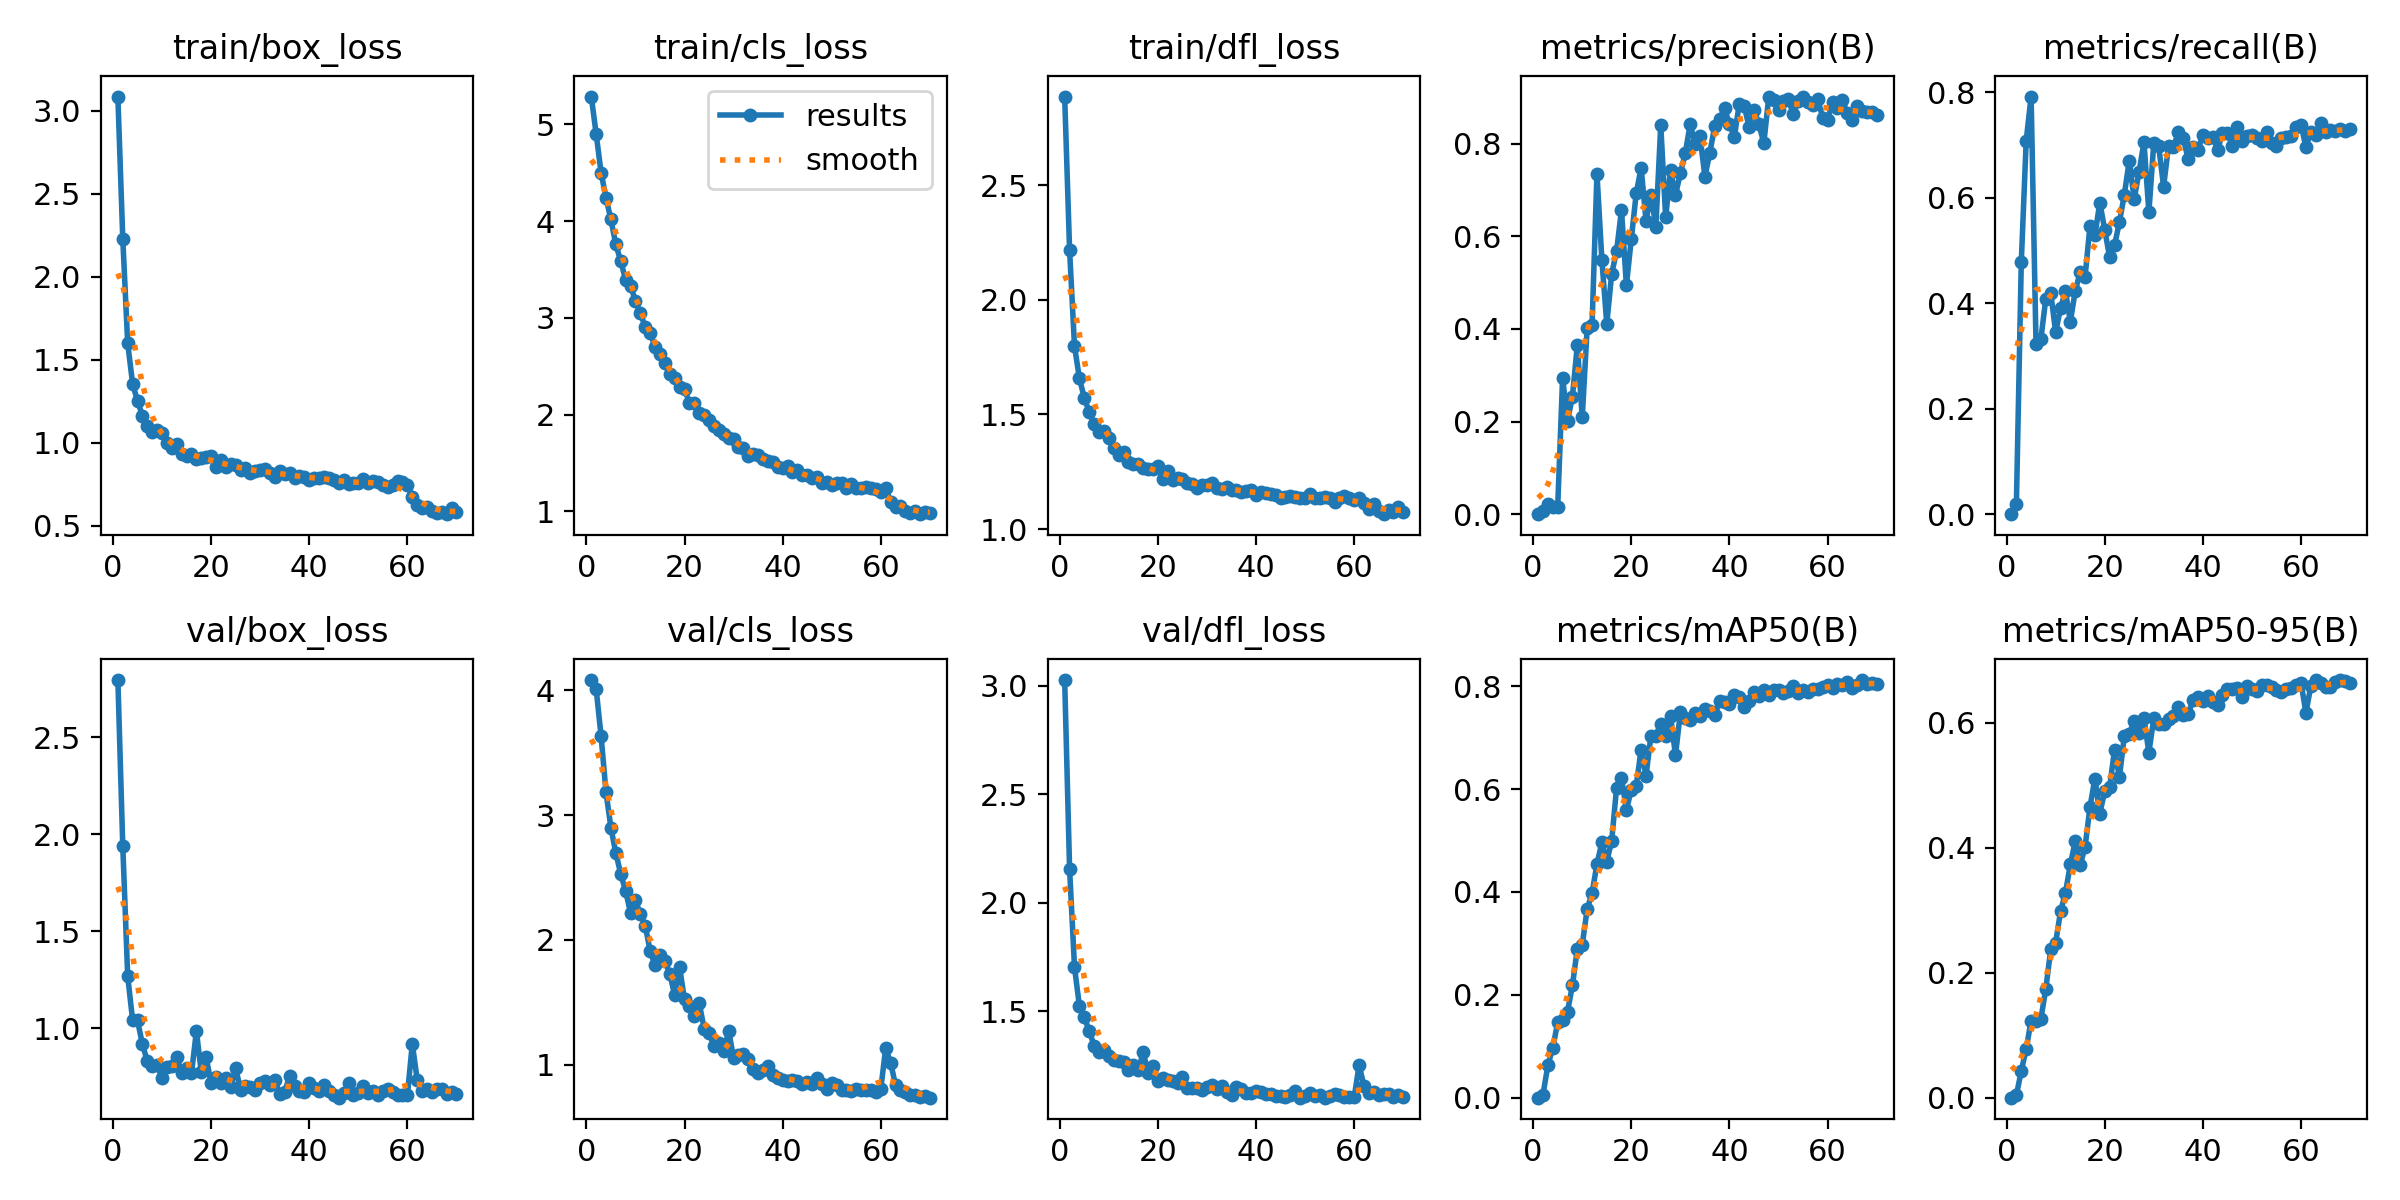

In [34]:
Image.open('/content/runs/detect/train/results.png')

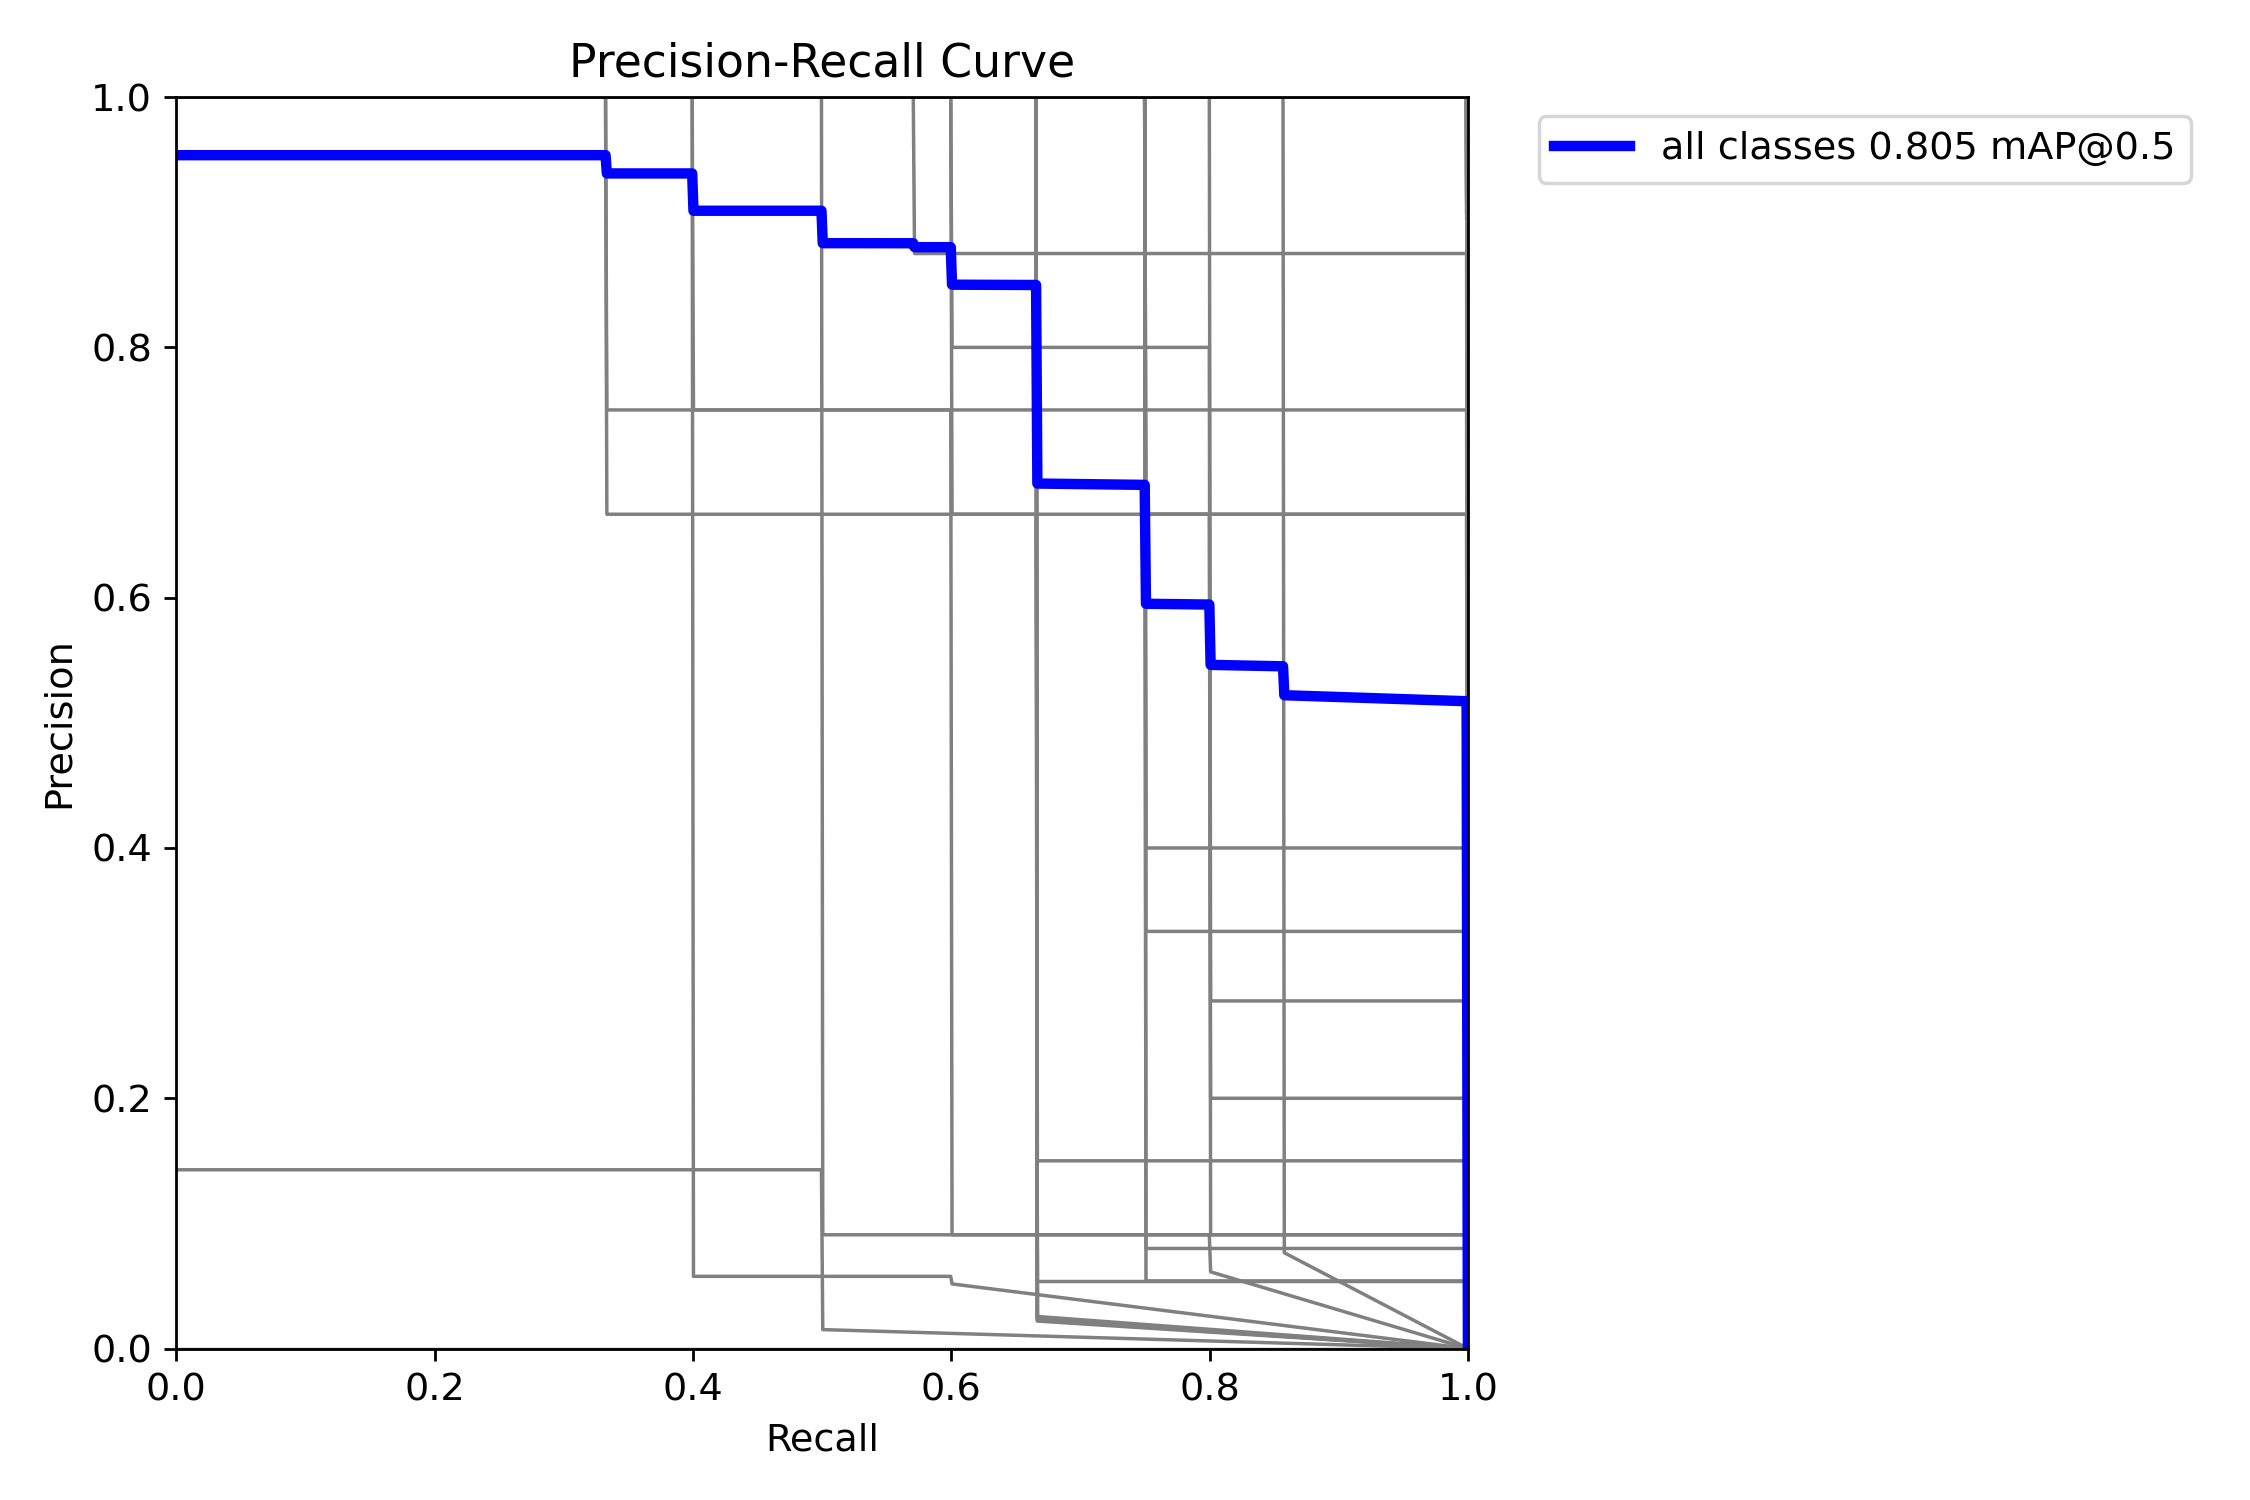

In [35]:
Image.open('/content/runs/detect/train/PR_curve.png')

# Inference

In [8]:
from glob import glob
from PIL import Image
import cv2
from ultralytics import YOLO
import matplotlib.pyplot as plt

In [9]:
test_path = glob("/content/test/images/*")

In [10]:
trained_model = YOLO("/content/runs/detect/train/weights/best.pt")


0: 640x640 1 Trailblazer-F-, 1: 640x640 1 DanHeng-ImbibitorLunae, 2: 640x640 1 Luocha, 3: 640x640 1 Lynx, 4: 640x640 1 Blade, 5: 640x640 1 Natasha, 30.0ms
Speed: 1.6ms preprocess, 5.0ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


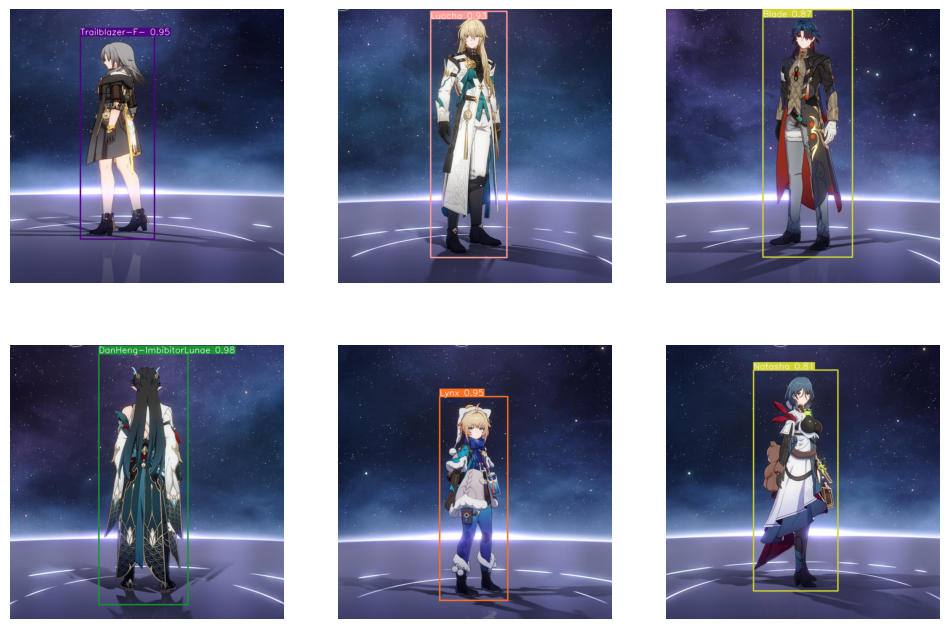

In [47]:
n = 6
results = trained_model.predict(test_path[:n])
fig, ax = plt.subplots(2, 3, figsize=(12, 8))
cnt = 0
for i in range(3):
  for j in range(2):
    plotted_pred = results[i+j+cnt].plot()
    ax[j][i].imshow(cv2.cvtColor(plotted_pred, cv2.COLOR_BGR2RGB))
    ax[j][i].axis('off')
  cnt += 1